# <span style="color:DarkOliveGreen">Hurst Exponent Calculation

__Summary:__ <span style="color:Blue">Explore the hurst exponent for various window sizes on given data

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst as hs
import os
np.random.seed(0)

In [2]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"
hurst_windows = [100, 150, 200, 250, 300, 400]

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\WorldQuant\Capstone\Draft Submission\MScFE_Capstone-main\Notebooks


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [5]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2012-01-01,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-02,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-03,1.000,1277.06,22.97,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98,118.000
2012-01-04,1.000,1277.30,22.22,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03,118.750
2012-01-05,0.917,1281.06,21.48,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06,120.001


In [6]:
print("shape:",df.shape)
print("first date:",df.index[0])
print("last date:",df.index[-1])

shape: (4018, 14)
first date: 2012-01-01 00:00:00
last date: 2022-12-31 00:00:00


## <span style="color:DarkOliveGreen">Functions

In [7]:
#This uses a ready to use module "hurst"
def Calculate_Hurst(df, var, window_size, ser_type):
    """
    Calculates the hurst exponent for the var:variable in df:dataset for given rolling window size
    ser_type: gives the type of series. It can be of three types:
        'change':      a series is just random values (i.e. np.random.randn(...))
        'random_walk': a series is a cumulative sum of changes (i.e. np.cumsum(np.random.randn(...)))
        'price':       a series is a cumulative product of changes (i.e. np.cumprod(1+epsilon*np.random.randn(...))
    """
    hurst = [np.nan] * (window_size-1)
    
    var_values = list(df[var])
    for i in range(0, len(var_values)-(window_size-1)):
        H, c, data = hs.compute_Hc(var_values[i:i+window_size], kind=ser_type, simplified=True)
        hurst.append(H)
        
    df['hurst_'+str(window_size)] = hurst
   
    return df

## <span style="color:DarkOliveGreen">Hurst Exponent time Plots

In [8]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

In [9]:
# Calculate hurst exponents for given window sizes
for i in range(0, len(hurst_windows)):
    df = Calculate_Hurst(df, 'IG_MID', hurst_windows[i], 'price')

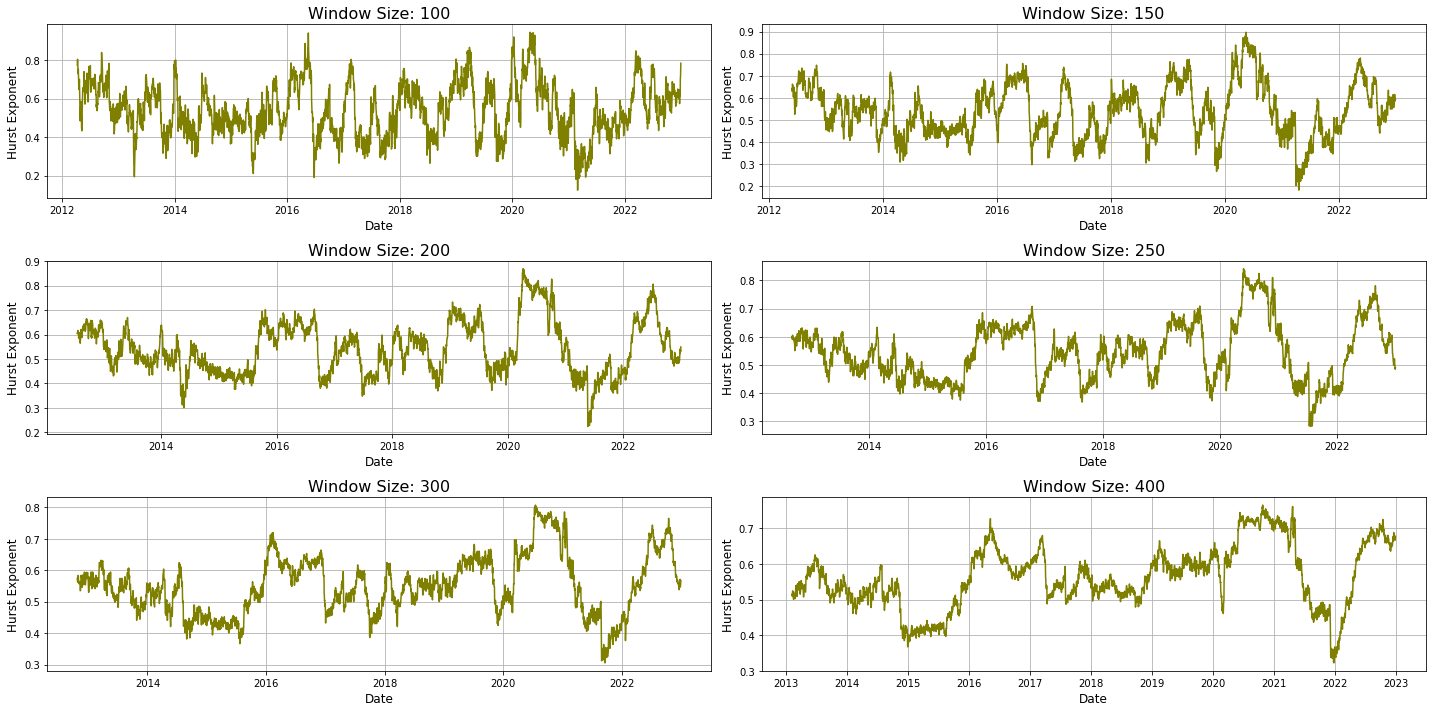

In [10]:
var_names = ['hurst_'+str(x) for x in hurst_windows]

# Plot hurst exponents
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.plot(df[var_names[0]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[0]), fontsize=16)
plt.grid()

plt.subplot(3,2,2)
plt.plot(df[var_names[1]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[1]), fontsize=16)
plt.grid()

plt.subplot(3,2,3)
plt.plot(df[var_names[2]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[2]), fontsize=16)
plt.grid()

plt.subplot(3,2,4)
plt.plot(df[var_names[3]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[3]), fontsize=16)
plt.grid()

plt.subplot(3,2,5)
plt.plot(df[var_names[4]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[4]), fontsize=16)
plt.grid()

plt.subplot(3,2,6)
plt.plot(df[var_names[5]].dropna(), color = 'olive', alpha=1.0)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[5]), fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('Hurst Exponent for different window size for ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Window size 100 gives a volatile Hurst, but the plot for Hurst with window sizes 200, 300 and 400 is very similar. With higher window sizes the trend smoothens

## <span style="color:DarkOliveGreen">Save the Data

In [11]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.to_csv("hurst_time_series"+".csv", index=True)

In [12]:
df

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID,hurst_100,hurst_150,hurst_200,hurst_250,hurst_300,hurst_400
Date,,,,,,,,,,,,,,,,,,,,
2012-01-01,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,1.000,1277.06,22.97,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98,118.000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,1.000,1277.30,22.22,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03,118.750,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.917,1281.06,21.48,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06,120.001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.617,3829.25,21.65,4.46,4.76,4.75,4.32,4.17,3.94,3.93,3.84,4.10,3.93,80.753,0.614355,0.602464,0.522525,0.503855,0.555116,0.670953
2022-12-28,0.907,3783.22,22.14,4.46,4.75,4.71,4.31,4.18,3.97,3.97,3.88,4.13,3.98,84.111,0.707565,0.586478,0.535478,0.494778,0.547007,0.667157
2022-12-29,0.632,3849.28,21.44,4.45,4.73,4.71,4.34,4.16,3.94,3.91,3.83,4.09,3.92,81.710,0.710166,0.600119,0.536727,0.487963,0.554555,0.666522


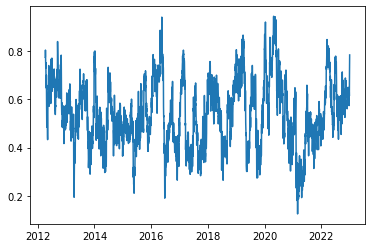

In [13]:
plt.plot(df['hurst_100'])